Answers

1. The priors and posteriors p(theta j) will always be in beta distributions.
2. Data: Win or lose for one game follows Bernoulli distribution, while the number of wins after playing for several rounds will follow the binomial distribution. 
3. Posterior update will following alpha = x + alpha and beta = n - x + beta. 
4. Repeatedly comparing sampled values from the posterior distribution implies which game is most likely to win.
5. Exploration versus exploitation: It's not wise to stick to the game that is most likely to win initially or wander around different games knowing the best option. The important thing is to attempt the alternatives a fair amount of time, with justification. In my algorithm, I will only play a game three times after it shows superiority. Then I will redo the comparison and see where it goes, even though it's three hits for three trials. 

My approach can be split into the following steps. 

1. **Initialization**: Assign random values to three probabilities (thetas) representing the true likelihood of winning in games A, B, and C.

2. **Defining Priors**: Set three initial priors as beta distributions with alpha = beta = 1, equivalent to a uniform distribution. 

3. **Sampling from Priors**: Sample a value from each prior distribution of three games. The game j with the highest sampled value is selected for play.

4. **Game Simulation**: Simulate playing the game j for n times using binomial distribution. Then model the likelihood of winning with binomial distribution given trials n and the number of wins x.

5. **Posterior Update**: Update the posterior distribution for game j using the formula alpha = x + alpha and beta = n - x + beta.

6. **Repeat**: Repeat steps 3 to 5 iteratively, analyzing the emerging patterns until significant differences are observed in the posterior distributions. Here I use human judgement (input) to determine as comparing three distributions can be tricky. 

7. **Consistency Verification**: After sufficient iterations, sample again from the updated posterior distributions to verify if there's a consistent difference across winning rates.



In [199]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import random

# functions

In [203]:

def draw_plot(alpha,beta,posteriors):
#draw a plot of three posterior distributions
    plt.plot(parameter_domain, posteriors[0].pdf(parameter_domain), label=f'Posterior A = beta ({alpha[0]},{beta[0]})', color='red')  
    plt.plot(parameter_domain, posteriors[1].pdf(parameter_domain), label=f'Posterior B = beta ({alpha[1]},{beta[1]})', color='blue', linestyle=("-."))  
    plt.plot(parameter_domain, posteriors[2].pdf(parameter_domain), label=f'Posterior C = beta ({alpha[2]},{beta[2]})', color='green', linestyle='--')  
    plt.legend()
    posteriors=[posterior_A,posterior_B,posterior_C]
    plt.show()
    
def update_posteriors(alpha,beta,posteriors,game=None):
    if game:
        posteriors[game] = stats.beta(alpha[game], beta[game])
    else:
        for i in range(3):
            posteriors[i] = stats.beta(alpha[i], beta[i])
    for i in range(3):
        print(f'Posterior {game_array[i]} = beta ({alpha[i]},{beta[i]})')
    return posteriors

    
def sample_posteriors(posteriors):
    sample=[]
    for i in range(3):
        sample.append(posteriors[i].rvs())
        sample_A = posterior_A.rvs()
        sample_B = posterior_B.rvs()
        sample_C = posterior_C.rvs()
    print("Three samples from posteriors",sample)
    max_sample = max(sample)
    game=sample.index(max_sample)
    print(f"let's play game {game_array[game]}")
    return game

def play_games(alpha, beta, game):
    outcome=stats.binom(n=3,p=p[game]).rvs()
    print("I won",outcome, "out of 3 games in", game_array[game])
    alpha[game]=outcome+alpha[game]
    beta[game]=n-outcome+beta[game]
    return alpha, beta


# Initialization

In [204]:
#specify true probabilities for each game using randomization
n=3
p=[]
for i in range(3):
    p.append(round(np.random.random(), 1)) 


# Defining Priors

In [205]:
#set prior as a beta distribution with alpha=beta=1, equavalent to a uniform distribution. 

#use array to represent the triplets of alpha and beta, representing parameters for three games. 
alpha = [1,1,1]
beta = [1,1,1]
parameter_domain = np.linspace(0,1,101)
game_array=["A","B","C"]

Posterior A = beta (1,1)
Posterior B = beta (1,1)
Posterior C = beta (1,1)


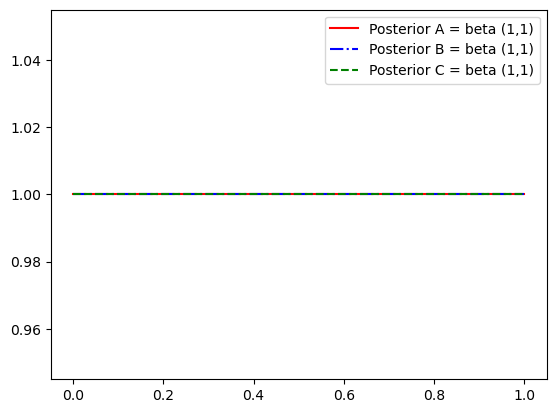

In [206]:
# The priors are named as posterior_j, as their value will be updated by posteriors
posteriors=[posterior_A,posterior_B,posterior_C]

posteriors=update_posteriors(alpha,beta,posteriors)
draw_plot(alpha,beta,posteriors)

## Sampling from Priors

In [209]:
#sample from all all three priors/posteriors

    
game=sample_posteriors(posteriors)

Three samples from posteriors [0.4160257101126189, 0.5603468817174764, 0.7209828318631804]
let's play game C


## Game Simulation

In [210]:
alpha,beta=play_games(alpha, beta, game)

I won 3 out of 3 games in C


## Updating posteriors

Posterior A = beta (1,1)
Posterior B = beta (1,1)
Posterior C = beta (4,1)


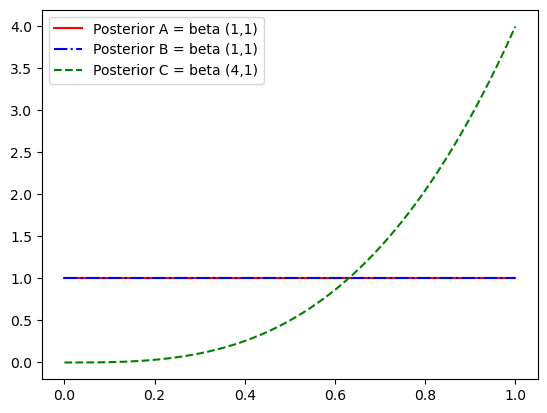

In [211]:
posteriors=update_posteriors(alpha,beta,posteriors,game)
draw_plot(alpha,beta,posteriors)

## repeat

Three samples from posteriors [0.43032957183854215, 0.2733889682097421, 0.9540206790318722]
let's play game C
I won 0 out of 3 games in C
Posterior A = beta (1,1)
Posterior B = beta (1,1)
Posterior C = beta (4,4)


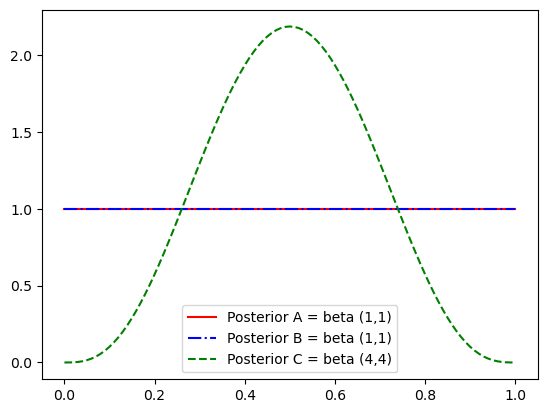

type 0 to terminate posterior update, type 1 to continue1
Three samples from posteriors [0.4629058694235955, 0.15181236560437672, 0.49812992502547854]
let's play game C
I won 2 out of 3 games in C
Posterior A = beta (1,1)
Posterior B = beta (1,1)
Posterior C = beta (6,5)


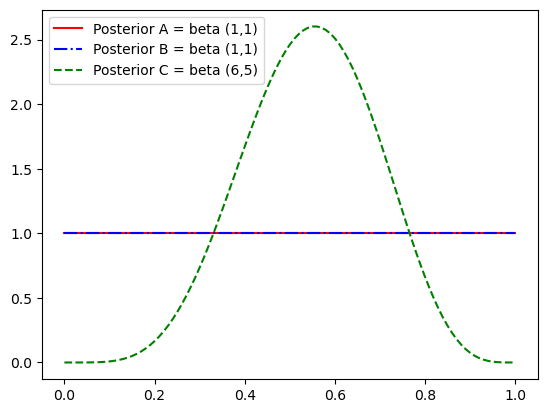

type 0 to terminate posterior update, type 1 to continue1
Three samples from posteriors [0.8408410183414058, 0.3354341309672701, 0.6194680957107307]
let's play game A
I won 1 out of 3 games in A
Posterior A = beta (2,3)
Posterior B = beta (1,1)
Posterior C = beta (6,5)


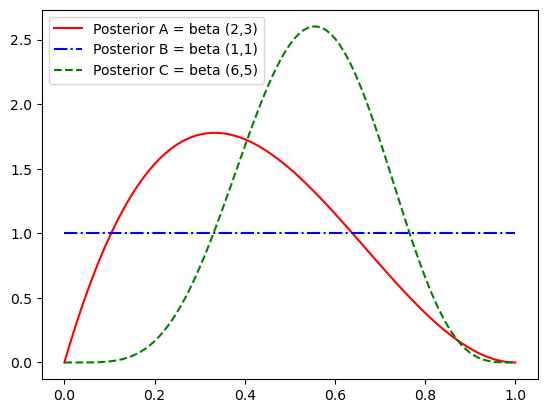

type 0 to terminate posterior update, type 1 to continue1
Three samples from posteriors [0.44992178590850335, 0.5156615117863037, 0.40743380073690716]
let's play game B
I won 3 out of 3 games in B
Posterior A = beta (2,3)
Posterior B = beta (4,1)
Posterior C = beta (6,5)


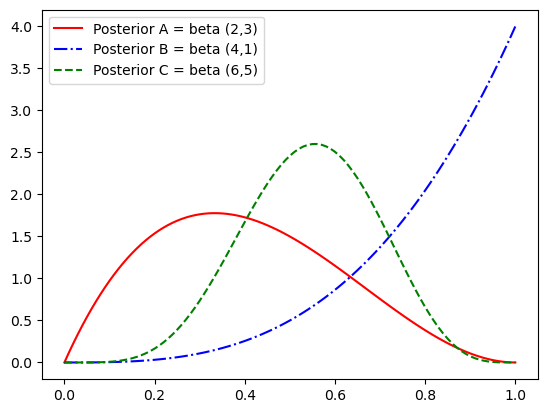

type 0 to terminate posterior update, type 1 to continue1
Three samples from posteriors [0.7108129657045609, 0.9805808522097835, 0.6357557517397924]
let's play game B
I won 3 out of 3 games in B
Posterior A = beta (2,3)
Posterior B = beta (7,1)
Posterior C = beta (6,5)


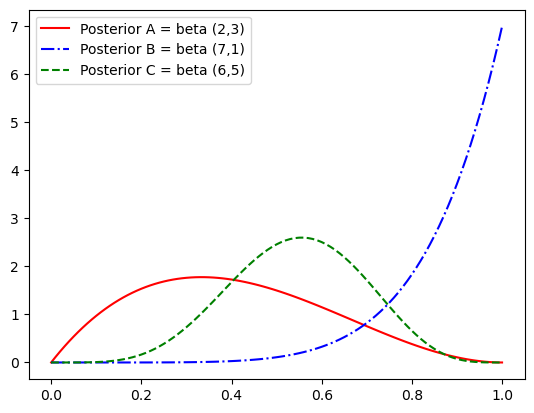

type 0 to terminate posterior update, type 1 to continue1
Three samples from posteriors [0.3112108210069717, 0.8802414096053784, 0.5285292160316472]
let's play game B
I won 3 out of 3 games in B
Posterior A = beta (2,3)
Posterior B = beta (10,1)
Posterior C = beta (6,5)


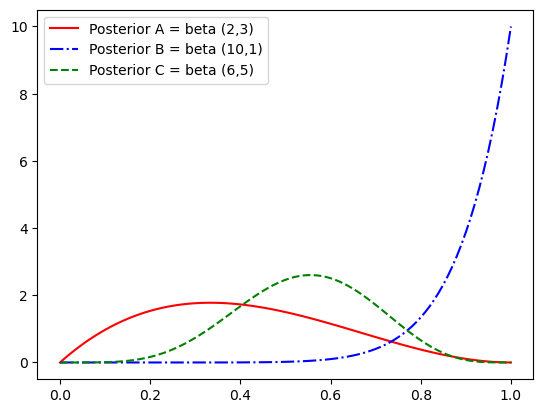

type 0 to terminate posterior update, type 1 to continue1
Three samples from posteriors [0.31419901385452725, 0.9644028606899753, 0.6473567952037798]
let's play game B
I won 3 out of 3 games in B
Posterior A = beta (2,3)
Posterior B = beta (13,1)
Posterior C = beta (6,5)


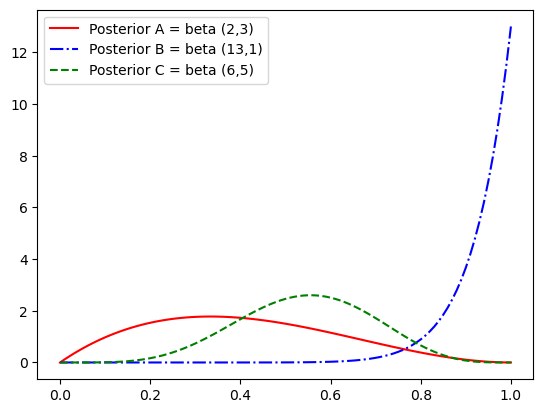

type 0 to terminate posterior update, type 1 to continue0


In [212]:
#repeat the process above
continue_play=1
while continue_play: 
    game=sample_posteriors(posteriors)
    alpha,beta=play_games(alpha,beta,game)
    posteriors=update_posteriors(alpha,beta,posteriors,game)
    draw_plot(alpha,beta,posteriors)
    continue_play=int(input("type 0 to terminate posterior update, type 1 to continue"))



## verification

In [213]:
best_game=[]
for i in range(10):
    game=sample_posteriors(posteriors)
    best_game.append(game)
if best_game.count(0)>8:
    print("play game A")
elif best_game.count(1)>8:
    print("play game B")
elif best_game.count(2)>8:
    print("play game A")
else:
    print("go back any try again")
    
    
print("Actually, the true probabilities are", p)


Three samples from posteriors [0.4799924866857597, 0.9576245963628773, 0.7433142148848152]
let's play game B
Three samples from posteriors [0.7708898367311608, 0.9997288947888828, 0.6534321340385777]
let's play game B
Three samples from posteriors [0.32825759102146534, 0.9073074568175334, 0.7380083674488563]
let's play game B
Three samples from posteriors [0.10861282558499194, 0.9927773819595118, 0.5689990996637332]
let's play game B
Three samples from posteriors [0.2869010673210351, 0.8909146782486163, 0.6590909408045401]
let's play game B
Three samples from posteriors [0.4493004322089726, 0.9724931228050088, 0.48588119588982953]
let's play game B
Three samples from posteriors [0.35765375317424825, 0.9860150144943507, 0.3567444617943171]
let's play game B
Three samples from posteriors [0.6803395137177709, 0.9796402324220017, 0.7969638242659454]
let's play game B
Three samples from posteriors [0.27130244622024213, 0.8265333788979824, 0.6338565201867005]
let's play game B
Three samples 